In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
ALGGF_training = pd.read_csv('/Users/paulivanespiritu/Documents/Jupyter/ALGGF-2.csv')
ALGGF_training
#this dataset is from yahoo - there are dates that has no stock info in this data set
#adj close was also moved to the second column for easier data setting

,Date,Adj Close,Open,High,Low,Close,Unnamed: 6,Volume
0,2020-01-02,0.21814,0.220,0.220,0.220,0.220,NaN,0
1,2020-01-03,0.21814,0.220,0.220,0.220,0.220,NaN,0
2,2020-01-06,0.21814,0.220,0.220,0.220,0.220,NaN,0
3,2020-01-07,0.21814,0.220,0.220,0.220,0.220,NaN,0
4,2020-01-08,0.21814,0.220,0.220,0.220,0.220,NaN,0
...,...,...,...,...,...,...,...,...
693,2022-10-03,0.18200,0.182,0.182,0.182,0.182,NaN,0
694,2022-10-04,0.18200,0.182,0.182,0.182,0.182,NaN,0
695,2022-10-05,0.18200,0.182,0.182,0.182,0.182,NaN,0
696,2022-10-06,0.18200,0.182,0.182,0.182,0.182,NaN,0


In [8]:
ALGGF_training_processed = ALGGF_training.iloc[:, 1:2].values
#will only use column 2 since we are only gonna be working on adj close values

In [9]:
#normalizing data or scaling it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

ALGGF_training_scaled = scaler.fit_transform(ALGGF_training_processed)

In [10]:
features_set = []
labels = []
for i in range(60, 698):
    features_set.append(ALGGF_training_scaled[i-60:i, 0])
    labels.append(ALGGF_training_scaled[i, 0])

In [11]:
features_set, labels = np.array(features_set), np.array(labels)
#converting original data to np array

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape 

(638, 60, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
model = Sequential()
#model class
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [15]:
model.add(Dropout(0.2))

In [16]:
#adding LSTM to the model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
model.add(Dense(units = 1))

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(features_set, labels, epochs = 100, batch_size = 20)
#algorithm Training - I will be using 100 epochs for this model

Epoch 1/100


2022-10-11 22:40:58.174021: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 4s 32ms/step - loss: 0.0824
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0209
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.0189
Epoch 4/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0158
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0145
Epoch 6/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0154
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0131
Epoch 8/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0127
Epoch 9/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0119
Epoch 10/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0126
Epoch 11/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0132
Epoch 12/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0124
Epoch 13/100
32/32 [=================

In [20]:
#we will now test comparing to the original data
ALGGF_training = pd.read_csv('/Users/paulivanespiritu/Documents/Jupyter/ALGGF-2.csv')
ALGGF_training_processed = ALGGF_training.iloc[:, 1:2]
ALGGF_training_processed

,Adj Close
0,0.21814
1,0.21814
2,0.21814
3,0.21814
4,0.21814
...,...
693,0.18200
694,0.18200
695,0.18200
696,0.18200


In [21]:
#converting
ALGGF_total = pd.concat((ALGGF_training['Open'], ALGGF_training['Open']), axis=0)

In [22]:
test_inputs = ALGGF_total[len(ALGGF_total) - len(ALGGF_training) - 60:].values
test_inputs.shape

(758,)

In [23]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [24]:
test_features = []
for i in range(60, 698):
    test_features.append(test_inputs[i-60:i, 0]) 

In [25]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
test_features.shape

(638, 60, 1)

In [26]:
predictions = model.predict(test_features)
#prediction use the function predict for this

20/20 [==============================] - 1s 10ms/step


In [27]:
predictions = scaler.inverse_transform(predictions)
predictions
#the data earlier were scaled and so as our results, using this function will inverse the action

array([[0.1876867 ],
       [0.20813553],
       [0.21650408],
       [0.2173083 ],
       [0.2180161 ],
       [0.2195371 ],
       [0.2211956 ],
       [0.22260925],
       [0.22369976],
       [0.2244967 ],
       [0.22505163],
       [0.2254139 ],
       [0.22562547],
       [0.22572073],
       [0.22572783],
       [0.2256694 ],
       [0.2255642 ],
       [0.22542754],
       [0.225272  ],
       [0.22510771],
       [0.22494288],
       [0.2247837 ],
       [0.22463486],
       [0.22385548],
       [0.22363223],
       [0.22353925],
       [0.22342908],
       [0.22331491],
       [0.2232157 ],
       [0.2231371 ],
       [0.2230786 ],
       [0.22303778],
       [0.22301179],
       [0.21724974],
       [0.21606678],
       [0.21616767],
       [0.21604878],
       [0.21570854],
       [0.21533227],
       [0.21500598],
       [0.21474986],
       [0.20244098],
       [0.1982382 ],
       [0.19807228],
       [0.1981346 ],
       [0.19764   ],
       [0.19686937],
       [0.196

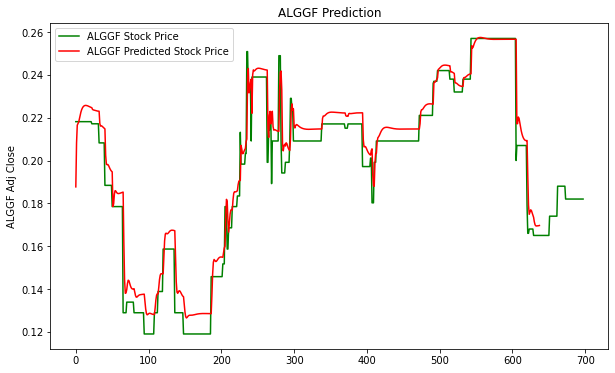

In [39]:
#This is my attempt to plot the first 60 day stock while running the predicted data. 
plt.figure(figsize=(10,6))
plt.plot(ALGGF_training_processed, color='green', label='ALGGF Stock Price')
plt.plot(predictions , color='red', label='ALGGF Predicted Stock Price')
plt.title('ALGGF Prediction')
plt.xlabel('')
plt.ylabel('ALGGF Adj Close')
plt.legend()
plt.show()

In [50]:
df=predictions
print(df)
df.to_csv('espiritu_alggf_forecast.csv')

[[0.1876867 ]
 [0.20813553]
 [0.21650408]
 [0.2173083 ]
 [0.2180161 ]
 [0.2195371 ]
 [0.2211956 ]
 [0.22260925]
 [0.22369976]
 [0.2244967 ]
 [0.22505163]
 [0.2254139 ]
 [0.22562547]
 [0.22572073]
 [0.22572783]
 [0.2256694 ]
 [0.2255642 ]
 [0.22542754]
 [0.225272  ]
 [0.22510771]
 [0.22494288]
 [0.2247837 ]
 [0.22463486]
 [0.22385548]
 [0.22363223]
 [0.22353925]
 [0.22342908]
 [0.22331491]
 [0.2232157 ]
 [0.2231371 ]
 [0.2230786 ]
 [0.22303778]
 [0.22301179]
 [0.21724974]
 [0.21606678]
 [0.21616767]
 [0.21604878]
 [0.21570854]
 [0.21533227]
 [0.21500598]
 [0.21474986]
 [0.20244098]
 [0.1982382 ]
 [0.19807228]
 [0.1981346 ]
 [0.19764   ]
 [0.19686937]
 [0.19611037]
 [0.19548652]
 [0.19502096]
 [0.19469815]
 [0.17853616]
 [0.17980622]
 [0.18430762]
 [0.18592803]
 [0.18569537]
 [0.18510996]
 [0.1847255 ]
 [0.18457519]
 [0.18456982]
 [0.18463813]
 [0.18474267]
 [0.184864  ]
 [0.18499215]
 [0.18512078]
 [0.18524528]
 [0.16159056]
 [0.1442056 ]
 [0.1379728 ]
 [0.13816497]
 [0.13974349]
 [0.14

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'